In [1]:
import sqlite3

In [2]:
con = sqlite3.connect("../data_set/liberty/libertykorea0813.db")
cur = con.cursor()

In [3]:
cur.execute("""
    SELECT content
    FROM table1
    ORDER BY id ASC
""")

In [4]:
corpus = [_[0] for _ in cur.fetchall()]

In [5]:
def eojeol(sentence, N=2):
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens) - (N-1)):
        ngram.append(tuple(tokens[i:i+N]))
    return ngram

def umjeol(token, N=2):
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append("".join(tokens[i:i+N]))
    return ngram

In [6]:
from konlpy.tag import Hannanum

In [7]:
corpus[0]

'\n\xa0\xa0연일 북한의 미사일 위협의 강도가 높아지는 가운데, 집권여당인 민주당은 천하태평이다.\n\n\xa0\xa0심지어 오늘(11일) 민주당은 논평에서 트럼프 미국 대통령의 입을 빌려 북한 김정은의 친서가 ‘아름다운 편지’였고 ‘북한이 한미연합훈련을 마음에 들어하지 않는다’는 내용이 포함되었다는 것을 강조한다.\n\n\xa0\xa0게다가 ‘김정은이 북한의 계속된 미사일 발사의 이유를 트럼프 대통령에게 해명한 것이 아닌가’ 판단된다는 설명도 덧붙이고 있다.\n\n\xa0\xa0민주당은 왜 북한의 미사일 도발에 대한 해명을 미국 대통령을 통해서 들어야 하는가? 집권여당이 직접 챙겨야 할 대한민국 안보를 팽개치고 제3국 평론하듯이 해서는 안 된다.\n\n\xa0\xa0대한민국 정부가 숨어 있을 때가 아니다. 우리 정부가 북한에 대해 당당하게 할 말을 하고 안보의 주도권을 가져야 한다.\n\n\xa0\xa0대한민국 안보를 위한 통상적 훈련을 하면서도 북한의 모욕에 가까운 비난을 들어야 하는 현실이 안타깝다. 북한 외무성 국장 명의의 공식 비난 담화를 듣고서도 특별한 입장이 없다는 청와대의 비겁성이 국민들을 부끄럽게 만든다는 것을 집권여당은 왜 모르는가?\n\n\xa0\xa0민주당이 자랑하던 한반도 평화 프로세스에 따라 문재인 대통령이 김정은에게 직접 미사일 도발에 대한 해명을 촉구해야 한다. 청와대에 남북 정상간의 ‘핫라인’을 설치했다고 밝힌지 오래 되었는데 북한의 무시로 실효성이 없다는 지적도 있다. 지금이 핫라인을 활용할 기회라는 점을 명심하길 바란다.\n\n2019. 8. 11.\n자유한국당 상근부대변인 장 능 인\n'

In [7]:
from nltk.tokenize import word_tokenize
word_tokenize(corpus[0])

['연일',
 '북한의',
 '미사일',
 '위협의',
 '강도가',
 '높아지는',
 '가운데',
 ',',
 '집권여당인',
 '민주당은',
 '천하태평이다',
 '.',
 '심지어',
 '오늘',
 '(',
 '11일',
 ')',
 '민주당은',
 '논평에서',
 '트럼프',
 '미국',
 '대통령의',
 '입을',
 '빌려',
 '북한',
 '김정은의',
 '친서가',
 '‘',
 '아름다운',
 '편지',
 '’',
 '였고',
 '‘',
 '북한이',
 '한미연합훈련을',
 '마음에',
 '들어하지',
 '않는다',
 '’',
 '는',
 '내용이',
 '포함되었다는',
 '것을',
 '강조한다',
 '.',
 '게다가',
 '‘',
 '김정은이',
 '북한의',
 '계속된',
 '미사일',
 '발사의',
 '이유를',
 '트럼프',
 '대통령에게',
 '해명한',
 '것이',
 '아닌가',
 '’',
 '판단된다는',
 '설명도',
 '덧붙이고',
 '있다',
 '.',
 '민주당은',
 '왜',
 '북한의',
 '미사일',
 '도발에',
 '대한',
 '해명을',
 '미국',
 '대통령을',
 '통해서',
 '들어야',
 '하는가',
 '?',
 '집권여당이',
 '직접',
 '챙겨야',
 '할',
 '대한민국',
 '안보를',
 '팽개치고',
 '제3국',
 '평론하듯이',
 '해서는',
 '안',
 '된다',
 '.',
 '대한민국',
 '정부가',
 '숨어',
 '있을',
 '때가',
 '아니다',
 '.',
 '우리',
 '정부가',
 '북한에',
 '대해',
 '당당하게',
 '할',
 '말을',
 '하고',
 '안보의',
 '주도권을',
 '가져야',
 '한다',
 '.',
 '대한민국',
 '안보를',
 '위한',
 '통상적',
 '훈련을',
 '하면서도',
 '북한의',
 '모욕에',
 '가까운',
 '비난을',
 '들어야',
 '하는',
 '현실이',
 '안타깝다',
 '.',
 '북한',
 '외무성',
 '국장',
 '명의의'

In [8]:
import re
from string import punctuation

In [9]:
pattern1 = re.compile(r"[{}]".format(re.escape(punctuation)))

In [10]:
sub1 = pattern1.sub("", corpus[0])

In [12]:
sub1

'\n\xa0\xa0연일 북한의 미사일 위협의 강도가 높아지는 가운데 집권여당인 민주당은 천하태평이다\n\n\xa0\xa0심지어 오늘11일 민주당은 논평에서 트럼프 미국 대통령의 입을 빌려 북한 김정은의 친서가 ‘아름다운 편지’였고 ‘북한이 한미연합훈련을 마음에 들어하지 않는다’는 내용이 포함되었다는 것을 강조한다\n\n\xa0\xa0게다가 ‘김정은이 북한의 계속된 미사일 발사의 이유를 트럼프 대통령에게 해명한 것이 아닌가’ 판단된다는 설명도 덧붙이고 있다\n\n\xa0\xa0민주당은 왜 북한의 미사일 도발에 대한 해명을 미국 대통령을 통해서 들어야 하는가 집권여당이 직접 챙겨야 할 대한민국 안보를 팽개치고 제3국 평론하듯이 해서는 안 된다\n\n\xa0\xa0대한민국 정부가 숨어 있을 때가 아니다 우리 정부가 북한에 대해 당당하게 할 말을 하고 안보의 주도권을 가져야 한다\n\n\xa0\xa0대한민국 안보를 위한 통상적 훈련을 하면서도 북한의 모욕에 가까운 비난을 들어야 하는 현실이 안타깝다 북한 외무성 국장 명의의 공식 비난 담화를 듣고서도 특별한 입장이 없다는 청와대의 비겁성이 국민들을 부끄럽게 만든다는 것을 집권여당은 왜 모르는가\n\n\xa0\xa0민주당이 자랑하던 한반도 평화 프로세스에 따라 문재인 대통령이 김정은에게 직접 미사일 도발에 대한 해명을 촉구해야 한다 청와대에 남북 정상간의 ‘핫라인’을 설치했다고 밝힌지 오래 되었는데 북한의 무시로 실효성이 없다는 지적도 있다 지금이 핫라인을 활용할 기회라는 점을 명심하길 바란다\n\n2019 8 11\n자유한국당 상근부대변인 장 능 인\n'

In [11]:
pattern2 = re.compile(r"[A-Za-z]{5,}")
sub2 = pattern2.sub(" ", sub1)

In [14]:
sub2

'\n\xa0\xa0연일 북한의 미사일 위협의 강도가 높아지는 가운데 집권여당인 민주당은 천하태평이다\n\n\xa0\xa0심지어 오늘11일 민주당은 논평에서 트럼프 미국 대통령의 입을 빌려 북한 김정은의 친서가 ‘아름다운 편지’였고 ‘북한이 한미연합훈련을 마음에 들어하지 않는다’는 내용이 포함되었다는 것을 강조한다\n\n\xa0\xa0게다가 ‘김정은이 북한의 계속된 미사일 발사의 이유를 트럼프 대통령에게 해명한 것이 아닌가’ 판단된다는 설명도 덧붙이고 있다\n\n\xa0\xa0민주당은 왜 북한의 미사일 도발에 대한 해명을 미국 대통령을 통해서 들어야 하는가 집권여당이 직접 챙겨야 할 대한민국 안보를 팽개치고 제3국 평론하듯이 해서는 안 된다\n\n\xa0\xa0대한민국 정부가 숨어 있을 때가 아니다 우리 정부가 북한에 대해 당당하게 할 말을 하고 안보의 주도권을 가져야 한다\n\n\xa0\xa0대한민국 안보를 위한 통상적 훈련을 하면서도 북한의 모욕에 가까운 비난을 들어야 하는 현실이 안타깝다 북한 외무성 국장 명의의 공식 비난 담화를 듣고서도 특별한 입장이 없다는 청와대의 비겁성이 국민들을 부끄럽게 만든다는 것을 집권여당은 왜 모르는가\n\n\xa0\xa0민주당이 자랑하던 한반도 평화 프로세스에 따라 문재인 대통령이 김정은에게 직접 미사일 도발에 대한 해명을 촉구해야 한다 청와대에 남북 정상간의 ‘핫라인’을 설치했다고 밝힌지 오래 되었는데 북한의 무시로 실효성이 없다는 지적도 있다 지금이 핫라인을 활용할 기회라는 점을 명심하길 바란다\n\n2019 8 11\n자유한국당 상근부대변인 장 능 인\n'

In [12]:
pattern3 = re.compile(r"[^ A-Za-z가-힣1-9]")
sub3 = pattern3.sub(" ", sub2)

In [16]:
sub3

'   연일 북한의 미사일 위협의 강도가 높아지는 가운데 집권여당인 민주당은 천하태평이다    심지어 오늘11일 민주당은 논평에서 트럼프 미국 대통령의 입을 빌려 북한 김정은의 친서가  아름다운 편지 였고  북한이 한미연합훈련을 마음에 들어하지 않는다 는 내용이 포함되었다는 것을 강조한다    게다가  김정은이 북한의 계속된 미사일 발사의 이유를 트럼프 대통령에게 해명한 것이 아닌가  판단된다는 설명도 덧붙이고 있다    민주당은 왜 북한의 미사일 도발에 대한 해명을 미국 대통령을 통해서 들어야 하는가 집권여당이 직접 챙겨야 할 대한민국 안보를 팽개치고 제3국 평론하듯이 해서는 안 된다    대한민국 정부가 숨어 있을 때가 아니다 우리 정부가 북한에 대해 당당하게 할 말을 하고 안보의 주도권을 가져야 한다    대한민국 안보를 위한 통상적 훈련을 하면서도 북한의 모욕에 가까운 비난을 들어야 하는 현실이 안타깝다 북한 외무성 국장 명의의 공식 비난 담화를 듣고서도 특별한 입장이 없다는 청와대의 비겁성이 국민들을 부끄럽게 만든다는 것을 집권여당은 왜 모르는가    민주당이 자랑하던 한반도 평화 프로세스에 따라 문재인 대통령이 김정은에게 직접 미사일 도발에 대한 해명을 촉구해야 한다 청와대에 남북 정상간의  핫라인 을 설치했다고 밝힌지 오래 되었는데 북한의 무시로 실효성이 없다는 지적도 있다 지금이 핫라인을 활용할 기회라는 점을 명심하길 바란다  2 19 8 11 자유한국당 상근부대변인 장 능 인 '

In [13]:
pattern4 = re.compile(r"\s{2,}")
sub4 = pattern4.sub(" ", sub3)

In [18]:
sub4

' 연일 북한의 미사일 위협의 강도가 높아지는 가운데 집권여당인 민주당은 천하태평이다 심지어 오늘11일 민주당은 논평에서 트럼프 미국 대통령의 입을 빌려 북한 김정은의 친서가 아름다운 편지 였고 북한이 한미연합훈련을 마음에 들어하지 않는다 는 내용이 포함되었다는 것을 강조한다 게다가 김정은이 북한의 계속된 미사일 발사의 이유를 트럼프 대통령에게 해명한 것이 아닌가 판단된다는 설명도 덧붙이고 있다 민주당은 왜 북한의 미사일 도발에 대한 해명을 미국 대통령을 통해서 들어야 하는가 집권여당이 직접 챙겨야 할 대한민국 안보를 팽개치고 제3국 평론하듯이 해서는 안 된다 대한민국 정부가 숨어 있을 때가 아니다 우리 정부가 북한에 대해 당당하게 할 말을 하고 안보의 주도권을 가져야 한다 대한민국 안보를 위한 통상적 훈련을 하면서도 북한의 모욕에 가까운 비난을 들어야 하는 현실이 안타깝다 북한 외무성 국장 명의의 공식 비난 담화를 듣고서도 특별한 입장이 없다는 청와대의 비겁성이 국민들을 부끄럽게 만든다는 것을 집권여당은 왜 모르는가 민주당이 자랑하던 한반도 평화 프로세스에 따라 문재인 대통령이 김정은에게 직접 미사일 도발에 대한 해명을 촉구해야 한다 청와대에 남북 정상간의 핫라인 을 설치했다고 밝힌지 오래 되었는데 북한의 무시로 실효성이 없다는 지적도 있다 지금이 핫라인을 활용할 기회라는 점을 명심하길 바란다 2 19 8 11 자유한국당 상근부대변인 장 능 인 '

In [14]:
pattern5 = re.compile(r"굴림")
sub5 = pattern5.sub(" ",sub4)

In [23]:
sub5

' 연일 북한의 미사일 위협의 강도가 높아지는 가운데 집권여당인 민주당은 천하태평이다 심지어 오늘11일 민주당은 논평에서 트럼프 미국 대통령의 입을 빌려 북한 김정은의 친서가 아름다운 편지 였고 북한이 한미연합훈련을 마음에 들어하지 않는다 는 내용이 포함되었다는 것을 강조한다 게다가 김정은이 북한의 계속된 미사일 발사의 이유를 트럼프 대통령에게 해명한 것이 아닌가 판단된다는 설명도 덧붙이고 있다 민주당은 왜 북한의 미사일 도발에 대한 해명을 미국 대통령을 통해서 들어야 하는가 집권여당이 직접 챙겨야 할 대한민국 안보를 팽개치고 제3국 평론하듯이 해서는 안 된다 대한민국 정부가 숨어 있을 때가 아니다 우리 정부가 북한에 대해 당당하게 할 말을 하고 안보의 주도권을 가져야 한다 대한민국 안보를 위한 통상적 훈련을 하면서도 북한의 모욕에 가까운 비난을 들어야 하는 현실이 안타깝다 북한 외무성 국장 명의의 공식 비난 담화를 듣고서도 특별한 입장이 없다는 청와대의 비겁성이 국민들을 부끄럽게 만든다는 것을 집권여당은 왜 모르는가 민주당이 자랑하던 한반도 평화 프로세스에 따라 문재인 대통령이 김정은에게 직접 미사일 도발에 대한 해명을 촉구해야 한다 청와대에 남북 정상간의 핫라인 을 설치했다고 밝힌지 오래 되었는데 북한의 무시로 실효성이 없다는 지적도 있다 지금이 핫라인을 활용할 기회라는 점을 명심하길 바란다 2 19 8 11 자유한국당 상근부대변인 장 능 인 '

In [15]:
pattern6 = re.compile(r"ptd")
sub6 = pattern6.sub(" ", sub5)

In [25]:
sub6

' 연일 북한의 미사일 위협의 강도가 높아지는 가운데 집권여당인 민주당은 천하태평이다 심지어 오늘11일 민주당은 논평에서 트럼프 미국 대통령의 입을 빌려 북한 김정은의 친서가 아름다운 편지 였고 북한이 한미연합훈련을 마음에 들어하지 않는다 는 내용이 포함되었다는 것을 강조한다 게다가 김정은이 북한의 계속된 미사일 발사의 이유를 트럼프 대통령에게 해명한 것이 아닌가 판단된다는 설명도 덧붙이고 있다 민주당은 왜 북한의 미사일 도발에 대한 해명을 미국 대통령을 통해서 들어야 하는가 집권여당이 직접 챙겨야 할 대한민국 안보를 팽개치고 제3국 평론하듯이 해서는 안 된다 대한민국 정부가 숨어 있을 때가 아니다 우리 정부가 북한에 대해 당당하게 할 말을 하고 안보의 주도권을 가져야 한다 대한민국 안보를 위한 통상적 훈련을 하면서도 북한의 모욕에 가까운 비난을 들어야 하는 현실이 안타깝다 북한 외무성 국장 명의의 공식 비난 담화를 듣고서도 특별한 입장이 없다는 청와대의 비겁성이 국민들을 부끄럽게 만든다는 것을 집권여당은 왜 모르는가 민주당이 자랑하던 한반도 평화 프로세스에 따라 문재인 대통령이 김정은에게 직접 미사일 도발에 대한 해명을 촉구해야 한다 청와대에 남북 정상간의 핫라인 을 설치했다고 밝힌지 오래 되었는데 북한의 무시로 실효성이 없다는 지적도 있다 지금이 핫라인을 활용할 기회라는 점을 명심하길 바란다 2 19 8 11 자유한국당 상근부대변인 장 능 인 '

In [16]:
pattern7 = re.compile(r"pt")
sub7 = pattern7.sub(" ", sub6)

In [27]:
sub7

' 연일 북한의 미사일 위협의 강도가 높아지는 가운데 집권여당인 민주당은 천하태평이다 심지어 오늘11일 민주당은 논평에서 트럼프 미국 대통령의 입을 빌려 북한 김정은의 친서가 아름다운 편지 였고 북한이 한미연합훈련을 마음에 들어하지 않는다 는 내용이 포함되었다는 것을 강조한다 게다가 김정은이 북한의 계속된 미사일 발사의 이유를 트럼프 대통령에게 해명한 것이 아닌가 판단된다는 설명도 덧붙이고 있다 민주당은 왜 북한의 미사일 도발에 대한 해명을 미국 대통령을 통해서 들어야 하는가 집권여당이 직접 챙겨야 할 대한민국 안보를 팽개치고 제3국 평론하듯이 해서는 안 된다 대한민국 정부가 숨어 있을 때가 아니다 우리 정부가 북한에 대해 당당하게 할 말을 하고 안보의 주도권을 가져야 한다 대한민국 안보를 위한 통상적 훈련을 하면서도 북한의 모욕에 가까운 비난을 들어야 하는 현실이 안타깝다 북한 외무성 국장 명의의 공식 비난 담화를 듣고서도 특별한 입장이 없다는 청와대의 비겁성이 국민들을 부끄럽게 만든다는 것을 집권여당은 왜 모르는가 민주당이 자랑하던 한반도 평화 프로세스에 따라 문재인 대통령이 김정은에게 직접 미사일 도발에 대한 해명을 촉구해야 한다 청와대에 남북 정상간의 핫라인 을 설치했다고 밝힌지 오래 되었는데 북한의 무시로 실효성이 없다는 지적도 있다 지금이 핫라인을 활용할 기회라는 점을 명심하길 바란다 2 19 8 11 자유한국당 상근부대변인 장 능 인 '

In [17]:
collection = []
for _ in corpus:
    collection.append(pattern4.sub(" ",
        pattern7.sub(" ",
            pattern6.sub(" ",
               pattern5.sub(" ",
                    pattern3.sub(" ",
                      pattern2.sub(" ",
                            pattern1.sub("", _))))))))

In [18]:
collection[0]

' 연일 북한의 미사일 위협의 강도가 높아지는 가운데 집권여당인 민주당은 천하태평이다 심지어 오늘11일 민주당은 논평에서 트럼프 미국 대통령의 입을 빌려 북한 김정은의 친서가 아름다운 편지 였고 북한이 한미연합훈련을 마음에 들어하지 않는다 는 내용이 포함되었다는 것을 강조한다 게다가 김정은이 북한의 계속된 미사일 발사의 이유를 트럼프 대통령에게 해명한 것이 아닌가 판단된다는 설명도 덧붙이고 있다 민주당은 왜 북한의 미사일 도발에 대한 해명을 미국 대통령을 통해서 들어야 하는가 집권여당이 직접 챙겨야 할 대한민국 안보를 팽개치고 제3국 평론하듯이 해서는 안 된다 대한민국 정부가 숨어 있을 때가 아니다 우리 정부가 북한에 대해 당당하게 할 말을 하고 안보의 주도권을 가져야 한다 대한민국 안보를 위한 통상적 훈련을 하면서도 북한의 모욕에 가까운 비난을 들어야 하는 현실이 안타깝다 북한 외무성 국장 명의의 공식 비난 담화를 듣고서도 특별한 입장이 없다는 청와대의 비겁성이 국민들을 부끄럽게 만든다는 것을 집권여당은 왜 모르는가 민주당이 자랑하던 한반도 평화 프로세스에 따라 문재인 대통령이 김정은에게 직접 미사일 도발에 대한 해명을 촉구해야 한다 청와대에 남북 정상간의 핫라인 을 설치했다고 밝힌지 오래 되었는데 북한의 무시로 실효성이 없다는 지적도 있다 지금이 핫라인을 활용할 기회라는 점을 명심하길 바란다 2 19 8 11 자유한국당 상근부대변인 장 능 인 '

In [18]:
len(word_tokenize(collection[0])), len(collection[0].split())

(174, 174)

In [18]:
han = Hannanum()

C:\Users\nefdu\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [24]:
# Tokenization(어절, 형태소, Ngram)
len(collection[0].split()), len(eojeol(collection[0])),\
len(umjeol(collection[0])), len(han.morphs(collection[0]))

(174, 173, 706, 340)

In [ ]:
len(han.morphs(collection[0]))

In [21]:
# Vocabulary1 = []
# Vocabulary2 = []
Vocabulary3 = []
# Vocabulary4 = []
for _ in collection:
#     Vocabulary1.extend(_.split())
#     Vocabulary2.extend(eojeol(_))
    Vocabulary3.extend(umjeol(_))
#     Vocabulary4.extend(han.morphs(_))

In [22]:
len(Vocabulary1),len(Vocabulary2),len(Vocabulary3)

(12613187, 12587588, 51346147)

In [ ]:
Vocabulary4 = []
index = 0
for _ in collection:
    index += 1
    Vocabulary4.extend(han.morphs(_))
    if index % 100 == 0:
        print(index, len(Vocabulary4))

100 91639
200 204737
300 315857
400 418661
500 513068
600 609472
700 716100
800 832257
900 941698
1000 1023521
1100 1091557
1200 1150959
1300 1235682
1400 1331738
1500 1424260
1600 1535799
1700 1640506
1800 1760280
1900 1851723
2000 1937328
2100 2014333
2200 2104769
2300 2202153
2400 2301604
2500 2395541
2600 2476094
2700 2550258
2800 2624485
2900 2699985
3000 2782666
3100 2885184
3200 2970713
3300 3051733
3400 3169399
3500 3290160
3600 3384823
3700 3498857
3800 3575592
3900 3657168
4000 3752584
4100 3840626
4200 3932255
4300 4025258
4400 4126575
4500 4207833
4600 4305674
4700 4388491
4800 4477301
4900 4585524
5000 4679438
5100 4764609
5200 4866338
5300 4970680
5400 5073355
5500 5162895
5600 5259549
5700 5408085
5800 5530378
5900 5682521
6000 5833795
6100 5987065


In [ ]:
len(Vocabulary4)


In [53]:
# 중복 제거, 길이 1 < < 6 토큰만
Vocab = [_ for _ in set(Vocabulary) if 1 < len(_) < 6]
len(Vocab)

7516676

In [54]:
BoM = [0 for _ in range(len(Vocab))]
for _ in collection[0].split() + eojeol(collection[0]) \
    + umjeol(collection[0]) + kkma.morphs(collection[0]):
    if _ in Vocab:
        BoM[Vocab.index(_)] = 1

KeyboardInterrupt: 

In [ ]:
len(Vocab) - sum(BoM), sum(BoM)

In [64]:
import pickle

In [66]:
with open('vocab', 'wb') as fp:
    pickle.dump(Vocab, fp)

In [67]:
with open('collection', 'wb') as fp:
    pickle.dump(collection, fp)

***

## word cloud

In [24]:
Vocabulary1

['연일',
 '북한의',
 '미사일',
 '위협의',
 '강도가',
 '높아지는',
 '가운데',
 '집권여당인',
 '민주당은',
 '천하태평이다',
 '심지어',
 '오늘11일',
 '민주당은',
 '논평에서',
 '트럼프',
 '미국',
 '대통령의',
 '입을',
 '빌려',
 '북한',
 '김정은의',
 '친서가',
 '아름다운',
 '편지',
 '였고',
 '북한이',
 '한미연합훈련을',
 '마음에',
 '들어하지',
 '않는다',
 '는',
 '내용이',
 '포함되었다는',
 '것을',
 '강조한다',
 '게다가',
 '김정은이',
 '북한의',
 '계속된',
 '미사일',
 '발사의',
 '이유를',
 '트럼프',
 '대통령에게',
 '해명한',
 '것이',
 '아닌가',
 '판단된다는',
 '설명도',
 '덧붙이고',
 '있다',
 '민주당은',
 '왜',
 '북한의',
 '미사일',
 '도발에',
 '대한',
 '해명을',
 '미국',
 '대통령을',
 '통해서',
 '들어야',
 '하는가',
 '집권여당이',
 '직접',
 '챙겨야',
 '할',
 '대한민국',
 '안보를',
 '팽개치고',
 '제3국',
 '평론하듯이',
 '해서는',
 '안',
 '된다',
 '대한민국',
 '정부가',
 '숨어',
 '있을',
 '때가',
 '아니다',
 '우리',
 '정부가',
 '북한에',
 '대해',
 '당당하게',
 '할',
 '말을',
 '하고',
 '안보의',
 '주도권을',
 '가져야',
 '한다',
 '대한민국',
 '안보를',
 '위한',
 '통상적',
 '훈련을',
 '하면서도',
 '북한의',
 '모욕에',
 '가까운',
 '비난을',
 '들어야',
 '하는',
 '현실이',
 '안타깝다',
 '북한',
 '외무성',
 '국장',
 '명의의',
 '공식',
 '비난',
 '담화를',
 '듣고서도',
 '특별한',
 '입장이',
 '없다는',
 '청와대의',
 '비겁성이',
 '국민들을',
 '부끄럽게',
 '만든다는',
 '것을'

In [27]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [26]:
!pip install wordcloud

In [35]:
wc = WordCloud().generate(collection[0])

<function matplotlib.pyplot.show(*args, **kw)>

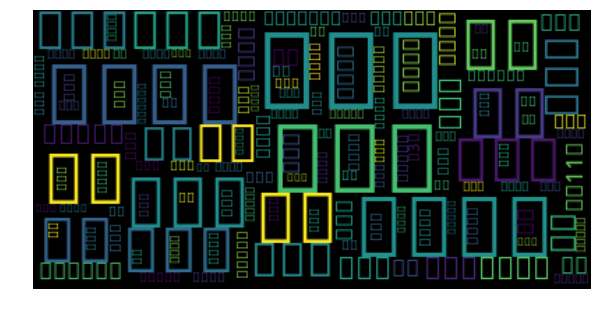

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show

In [ ]:
def make_wc(word_count):
    noun_adj_list = []
    for _ in Vocabulary2:
        for word, tag in _:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print(tags)
    
    wc = WordCloud(background_color='white', width=800, height=800)
    print(dict(tags))
    
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wocl = WordCloud(max_font_size=150, background_color='white').generate(Vocabulary4)

fig = plt.figure()
plt.imshow(wocl, interpolation='bilinear')
plt.axis('off')
plt.savefig('')